# Exploratory Data Analysis with Python: Global Population Trends

- **Objective**: To investigate population trends from year 1950-2021, find out any growth patterns, and validate our findings using statistical methods.
- **Data Source**: [Population Growth: Published online at OurWorldinData.org](https://ourworldindata.org/population-growth)


In this analysis, we will explore global population trends over time and demographic data across different age groups. Using Python, we conduct exploratory data analysis (EDA) to uncover patterns, compare pre- and post-2000 population distributions, and perform statistical tests to validate insights.  

---

# Data Exploration

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing data
data = pd.read_csv('./population-and-demography.csv')
data.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,263301,211816,164736,113474,67953,31345,9963,1830,179,11


In [3]:
data.isnull().sum()

Country name                                  0
Year                                          0
Population                                    0
Population of children under the age of 1     0
Population of children under the age of 5     0
Population of children under the age of 15    0
Population under the age of 25                0
Population aged 15 to 64 years                0
Population older than 15 years                0
Population older than 18 years                0
Population at age 1                           0
Population aged 1 to 4 years                  0
Population aged 5 to 9 years                  0
Population aged 10 to 14 years                0
Population aged 15 to 19 years                0
Population aged 20 to 29 years                0
Population aged 30 to 39 years                0
Population aged 40 to 49 years                0
Population aged 50 to 59 years                0
Population aged 60 to 69 years                0
Population aged 70 to 79 years          

In [4]:
data.duplicated().sum()

0

- There are no null values in the dataset.
- There is one string column for country, while the rest all are int type.
- There are no duplicate values in the dataset.

In [5]:
data.shape

(18288, 40)

In [6]:
print(data.Year.min())
print(data.Year.max())

1950
2021


# Data Cleaning

In [7]:
data.columns

Index(['Country name', 'Year', 'Population',
       'Population of children under the age of 1',
       'Population of children under the age of 5',
       'Population of children under the age of 15',
       'Population under the age of 25', 'Population aged 15 to 64 years',
       'Population older than 15 years', 'Population older than 18 years',
       'Population at age 1', 'Population aged 1 to 4 years',
       'Population aged 5 to 9 years', 'Population aged 10 to 14 years',
       'Population aged 15 to 19 years', 'Population aged 20 to 29 years',
       'Population aged 30 to 39 years', 'Population aged 40 to 49 years',
       'Population aged 50 to 59 years', 'Population aged 60 to 69 years',
       'Population aged 70 to 79 years', 'Population aged 80 to 89 years',
       'Population aged 90 to 99 years', 'Population older than 100 years',
       'population__all__20_24__records', 'population__all__25_29__records',
       'population__all__30_34__records', 'population__all__

In [8]:
# drop irrelevant cols:
# here we are dropping population brackets of 5 years, which is very granular
drop_cols = [col for col in data.columns if 'population__all_' in col]
data.drop(columns=drop_cols, inplace=True)

In [9]:
# standarize column names:

data.columns = data.columns.map(lambda x: x.lower())
data.columns = data.columns.map(lambda x: x.replace(" ", "_"))
data.columns

Index(['country_name', 'year', 'population',
       'population_of_children_under_the_age_of_1',
       'population_of_children_under_the_age_of_5',
       'population_of_children_under_the_age_of_15',
       'population_under_the_age_of_25', 'population_aged_15_to_64_years',
       'population_older_than_15_years', 'population_older_than_18_years',
       'population_at_age_1', 'population_aged_1_to_4_years',
       'population_aged_5_to_9_years', 'population_aged_10_to_14_years',
       'population_aged_15_to_19_years', 'population_aged_20_to_29_years',
       'population_aged_30_to_39_years', 'population_aged_40_to_49_years',
       'population_aged_50_to_59_years', 'population_aged_60_to_69_years',
       'population_aged_70_to_79_years', 'population_aged_80_to_89_years',
       'population_aged_90_to_99_years', 'population_older_than_100_years'],
      dtype='object')

In [10]:
col_names = {
    'country_name': 'country',
    'year': 'year',
    'population': 'pop_total',
    'population_of_children_under_the_age_of_1': 'pop_u1',
    'population_of_children_under_the_age_of_5': 'pop_u5',
    'population_of_children_under_the_age_of_15': 'pop_u15',
    'population_under_the_age_of_25': 'pop_u25',
    'population_aged_15_to_64_years': 'pop_15_64',
    'population_older_than_15_years': 'pop_o15',
    'population_older_than_18_years': 'pop_o18',
    'population_at_age_1': 'pop_1',
    'population_aged_1_to_4_years': 'pop_1_4',
    'population_aged_5_to_9_years': 'pop_5_9',
    'population_aged_10_to_14_years': 'pop_10_14',
    'population_aged_15_to_19_years': 'pop_15_19',
    'population_aged_20_to_29_years': 'pop_20_29',
    'population_aged_30_to_39_years': 'pop_30_39',
    'population_aged_40_to_49_years': 'pop_40_49',
    'population_aged_50_to_59_years': 'pop_50_59',
    'population_aged_60_to_69_years': 'pop_60_69',
    'population_aged_70_to_79_years': 'pop_70_79',
    'population_aged_80_to_89_years': 'pop_80_89',
    'population_aged_90_to_99_years': 'pop_90_99',
    'population_older_than_100_years': 'pop_o100',
}

data = data.rename(columns=col_names)
data.head()

,country,year,pop_total,pop_u1,pop_u5,pop_u15,pop_u25,pop_15_64,pop_o15,pop_o18,...,pop_15_19,pop_20_29,pop_30_39,pop_40_49,pop_50_59,pop_60_69,pop_70_79,pop_80_89,pop_90_99,pop_o100
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


To simplify the population distribution, let's create a broader age category bracket so that patterns are easier to identify:
1. Children (0-14) 
2. Youth (15-24)
3. Working Age (25-64)
4. Seniors (65+)

In [11]:
data['pop_children'] = (data['pop_u1'] + data['pop_u5'] + data['pop_u15'] + data['pop_1_4'] + data['pop_5_9'] + data['pop_10_14'])
data['pop_youth'] = data['pop_15_19'] + data['pop_20_29']
data['pop_adult'] = data['pop_30_39'] + data['pop_40_49'] + data['pop_50_59'] + data['pop_60_69']
data['pop_senior'] = data['pop_70_79'] + data['pop_80_89'] + data['pop_90_99'] + data['pop_o100']

In [12]:
data.head()

,country,year,pop_total,pop_u1,pop_u5,pop_u15,pop_u25,pop_15_64,pop_o15,pop_o18,...,pop_50_59,pop_60_69,pop_70_79,pop_80_89,pop_90_99,pop_o100,pop_children,pop_youth,pop_adult,pop_senior
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,467170,271905,92691,9499,123,0.0,7385992.0,1998461,2310835,102313.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,468881,273286,94358,10155,118,0.0,7457745.0,2029520,2331947,104631.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,470898,274852,96026,10721,139,0.0,7538360.0,2061699,2353879,106886.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,472969,276577,97705,11254,166,0.0,7627489.0,2093111,2375931,109125.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,475117,278210,99298,11793,190,0.0,7729937.0,2122984,2398964,111281.0


In [13]:
data.columns

Index(['country', 'year', 'pop_total', 'pop_u1', 'pop_u5', 'pop_u15',
       'pop_u25', 'pop_15_64', 'pop_o15', 'pop_o18', 'pop_1', 'pop_1_4',
       'pop_5_9', 'pop_10_14', 'pop_15_19', 'pop_20_29', 'pop_30_39',
       'pop_40_49', 'pop_50_59', 'pop_60_69', 'pop_70_79', 'pop_80_89',
       'pop_90_99', 'pop_o100', 'pop_children', 'pop_youth', 'pop_adult',
       'pop_senior'],
      dtype='object')

In [14]:
df = data[['country', 'year', 'pop_total', 'pop_children', 'pop_youth', 'pop_adult', 'pop_senior']]
df.head()

,country,year,pop_total,pop_children,pop_youth,pop_adult,pop_senior
0,Afghanistan,1950,7480464,7385992.0,1998461,2310835,102313.0
1,Afghanistan,1951,7571542,7457745.0,2029520,2331947,104631.0
2,Afghanistan,1952,7667534,7538360.0,2061699,2353879,106886.0
3,Afghanistan,1953,7764549,7627489.0,2093111,2375931,109125.0
4,Afghanistan,1954,7864289,7729937.0,2122984,2398964,111281.0


Our initial dataframe is ready! Let's quickly clean the columns now:

In [15]:
# Clean country column:
df['country'].unique()

array(['Afghanistan', 'Africa (UN)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia (UN)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial

It seems the `country` column includes some vague values representing income category brackets. We will remove it from the dataframe to get clarity in analysis.

We are also creating a new dataframe `df_categories` which will be used later to study income categories.

In [16]:
country_categories = ['World', 'High-income countries', 'Upper-middle-income countries', 
                      'Africa (UN)', 'Europe (UN)', 'Asia (UN)', 'Less developed regions', 
                      'excluding China', 'Lower-middle-income countries', 'More developed regions', 
                      'Less developed regions, excluding least developed countries', 
                      'Less developed regions, excluding China', 'Least developed countries', 
                      'Low-income countries',  'Land-locked developing countries (LLDC)']

df_categories = df[df['country'].isin(country_categories)]
df = df[~df['country'].isin(country_categories) & ~df['country'].str.contains('UN', na=False)]

In [17]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [18]:
# check for outliers: if total population is less than 0
df[df['pop_total'] < 0]

,country,year,pop_total,pop_children,pop_youth,pop_adult,pop_senior


In [19]:
# check year column
df['year'].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [20]:
df.dtypes

country          object
year              int64
pop_total         int64
pop_children    float64
pop_youth         int64
pop_adult         int64
pop_senior      float64
dtype: object

In [21]:
df['pop_children'] = df['pop_children'].astype('int64')
df['pop_senior'] = df['pop_senior'].astype('int64')

# Exploratory Data Analysis

## Set up consistent styles:

In [22]:
# set plot styles
sns.set_style("darkgrid")

# set color palette
# palette = ["#2e4057", "#083d77", "#da4167", "#386150", "#58b09c", 
#            "#caf7e2", "#3d3522", "#4a442d", "#f4d35e","#f6d8ae"]
sns.set_palette('YlGnBu_r')

# set visual parameters
plt.rcParams.update({
    "figure.dpi": 100,
    "axes.grid": True,
    "grid.alpha": 0.8,
    "grid.color": "#D3D3D3",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "axes.spines.top": False,
    "axes.spines.right": False
})

# remove borders
sns.despine()

# set text parameters
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 11,
    "axes.titlesize": 12,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "axes.labelsize": 10,
    "axes.labelweight": "bold",
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

<Figure size 640x480 with 0 Axes>

## Top 5 Countries by Population Size in 2021

In [23]:
latest_year, earliest_year = df['year'].max(), df['year'].min()  
print(latest_year)
print(earliest_year)

2021
1950


<Figure size 640x480 with 0 Axes>

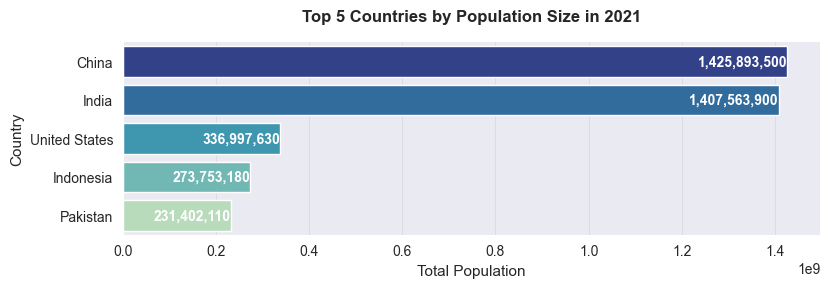

In [24]:
# 5 most populated countries in 2021
top_5_in_2021 = df[df['year'] == latest_year].groupby('country')[['pop_total']].sum().sort_values(by='pop_total', ascending=False).head()
top_5_in_2021.reset_index(inplace=True)

plt.tight_layout()
plt.figure(figsize=(9, 2.5))

sns.barplot(data=top_5_in_2021, y='country', x='pop_total')
plt.title('Top 5 Countries by Population Size in 2021')
plt.xlabel('Total Population')
plt.ylabel('Country')

for i, row in top_5_in_2021.iterrows():
    plt.text(row['pop_total'], i, f"{row['pop_total']:,}", 
             fontweight='bold', fontsize=10, color='white', va='center', ha='right') 
plt.show()

<Figure size 640x480 with 0 Axes>

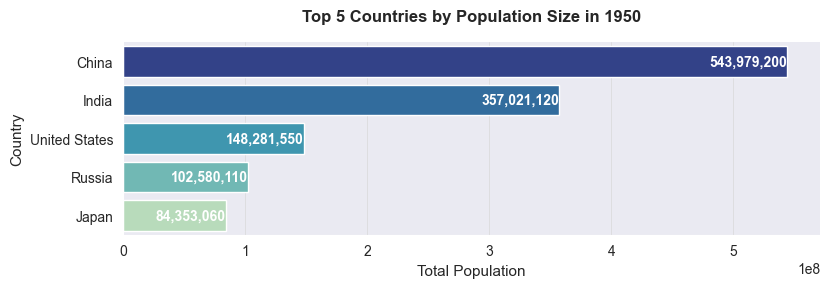

In [25]:
# 5 most populated countries in 1950
top_5_in_1950 = df[df['year'] == earliest_year].groupby('country')[['pop_total']].sum().sort_values(by='pop_total', ascending=False).head()
top_5_in_1950.reset_index(inplace=True)

plt.tight_layout()
plt.figure(figsize=(9, 2.5))

sns.barplot(data=top_5_in_1950, y='country', x='pop_total')
plt.title('Top 5 Countries by Population Size in 1950')
plt.xlabel('Total Population')
plt.ylabel('Country')

for i, row in top_5_in_1950.iterrows():
    plt.text(row['pop_total'], i, f"{row['pop_total']:,}", 
             fontweight='bold', fontsize=10, color='white', va='center', ha='right') 
plt.show()

## Bottom 5 Countries by Population Size

<Figure size 640x480 with 0 Axes>

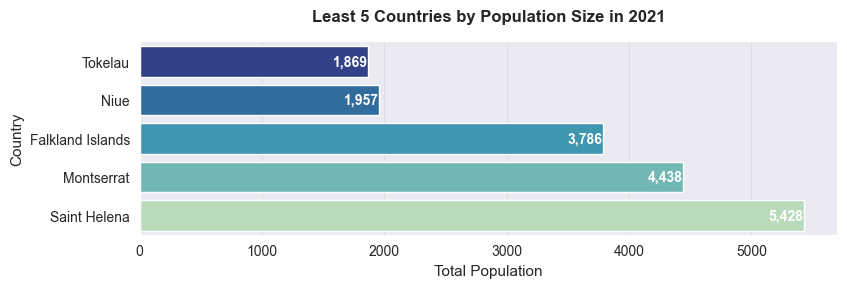

In [26]:
# 5 least populated countries in 2021
bottom_5_in_2021 = df[df['year'] == latest_year].groupby('country')[['pop_total']].sum().sort_values(by='pop_total').head()
bottom_5_in_2021.reset_index(inplace=True)

plt.tight_layout()
plt.figure(figsize=(9, 2.5))

sns.barplot(data=bottom_5_in_2021, y='country', x='pop_total')
plt.title('Least 5 Countries by Population Size in 2021')
plt.xlabel('Total Population')
plt.ylabel('Country')

for i, row in bottom_5_in_2021.iterrows():
    plt.text(row['pop_total'], i, f"{row['pop_total']:,}", 
             fontweight='bold', fontsize=10, color='white', va='center', ha='right') 
plt.show()

<Figure size 640x480 with 0 Axes>

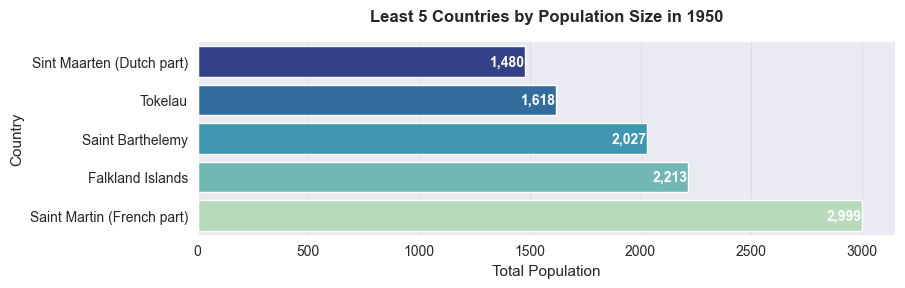

In [27]:
# 5 least populated countries in 1950
bottom_5_in_1950 = df[df['year'] == earliest_year].groupby('country')[['pop_total']].sum().sort_values(by='pop_total').head()
bottom_5_in_1950.reset_index(inplace=True)

plt.tight_layout()
plt.figure(figsize=(9, 2.5))

sns.barplot(data=bottom_5_in_1950, y='country', x='pop_total')
plt.title('Least 5 Countries by Population Size in 1950')
plt.xlabel('Total Population')
plt.ylabel('Country')

for i, row in bottom_5_in_1950.iterrows():
    plt.text(row['pop_total'], i, f"{row['pop_total']:,}", 
             fontweight='bold', fontsize=10, color='white', va='center', ha='right') 
plt.show()

## Population Growth Over the Years

<Figure size 640x480 with 0 Axes>

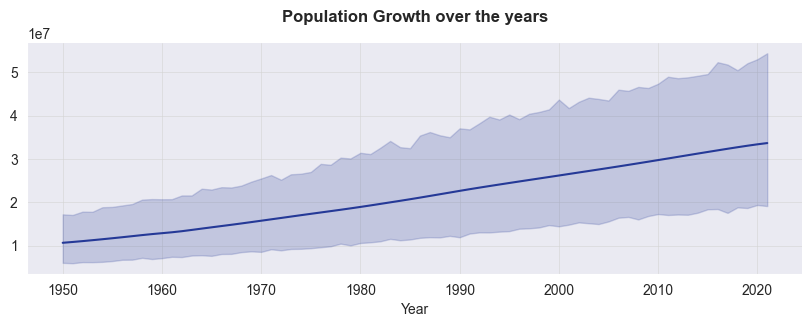

In [28]:
plt.tight_layout()
plt.figure(figsize=(10,3))
sns.lineplot(data=df, y='pop_total',x='year')
plt.title('Population Growth over the years', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('', fontsize=10)
plt.show()

- Population has shown consistent growth from 1950 to 2020, with no recorded declines.
- Post-1980, the growth rate accelerated. This is likely due to improvements in healthcare and economic stability over decades.

But if we observe, the uncertainty region (shaded region: variability in data) is much spread after 1980.

### Does the data support this? Or are there anomalies?

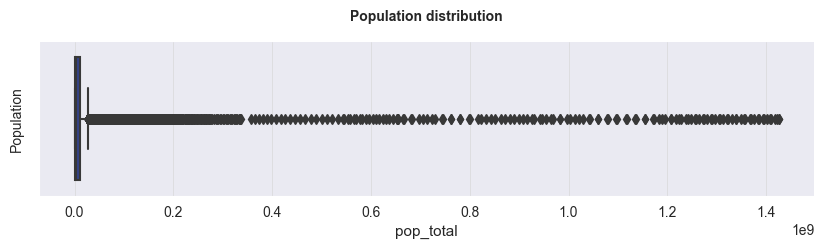

In [29]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x='pop_total')
plt.title("Population distribution", fontsize=10)
plt.ylabel("Population", fontsize=10)
plt.show()

**Observations:**

The boxplot suggests the presence of extreme outliers in the `population` column. 

- Some countries (Eg: China) have significantly higher populations than others (Eg: Tokelau).
- These are expected extreme values and not statistical outliers in the usual sense, so we will apply log transformations to make the distribution easier to visualize.

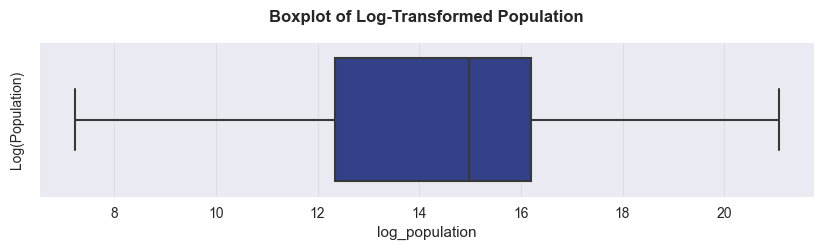

In [30]:
# log1p
df['log_population'] = np.log1p(df['pop_total'])

plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='log_population')

plt.title("Boxplot of Log-Transformed Population", fontsize=12)
plt.ylabel("Log(Population)", fontsize=10)
plt.show()

<Figure size 640x480 with 0 Axes>

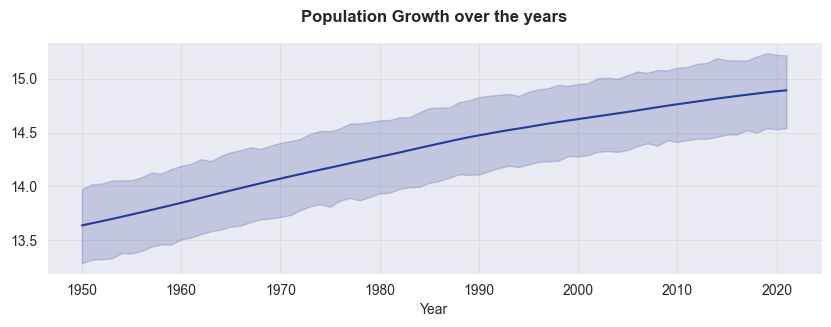

In [31]:
plt.tight_layout()
plt.figure(figsize=(10,3))
sns.lineplot(data=df, y='log_population',x='year')
plt.title('Population Growth over the years', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('', fontsize=10)
plt.show()

Now the population distribution appears to be more uniform. We will be using these *log-transformed values* for population from now on.

---
## Population Distribution

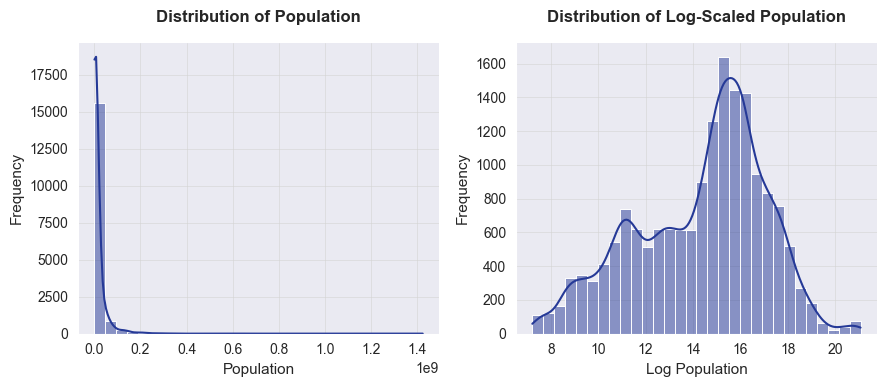

In [32]:
plt.figure(figsize=(9, 4))

# using pop_total
plt.subplot(1, 2, 1)
sns.histplot(df['pop_total'], bins=30, kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

# using log_population
plt.subplot(1, 2, 2)
sns.histplot(np.log(df['pop_total']), bins=30, kde=True)
plt.title('Distribution of Log-Scaled Population')
plt.xlabel('Log Population')
plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

**Observations**:

- **On the left**: original population distribution.  
    - The original population is highly skewed, with a few very large values.  
- **On the right**: log-transformed population distribution.  
    - As we can see, log transformation makes the curve more bell-shaped and hence easy to interpret.  
    - Population data is right-skewed with a few countries having very high populations.
    - Most populations are within the range of **log 15-17** (peak values).

---
**How has the population changed over the years?**

## Country-wise Population Trends

We will now calculate the year-over-year growth rate to analyze how the population changes over time for each country. 

This can help us to compare growth trends across different population sizes more effectively.

In [33]:
df["growth_rate"] = df.groupby("country")["pop_total"].pct_change() * 100

In [34]:
df['growth_rate'].isna().sum()

237

In [35]:
df['growth_rate'] = df['growth_rate'].fillna(0)

### Population Growth Rate (1950-2021)

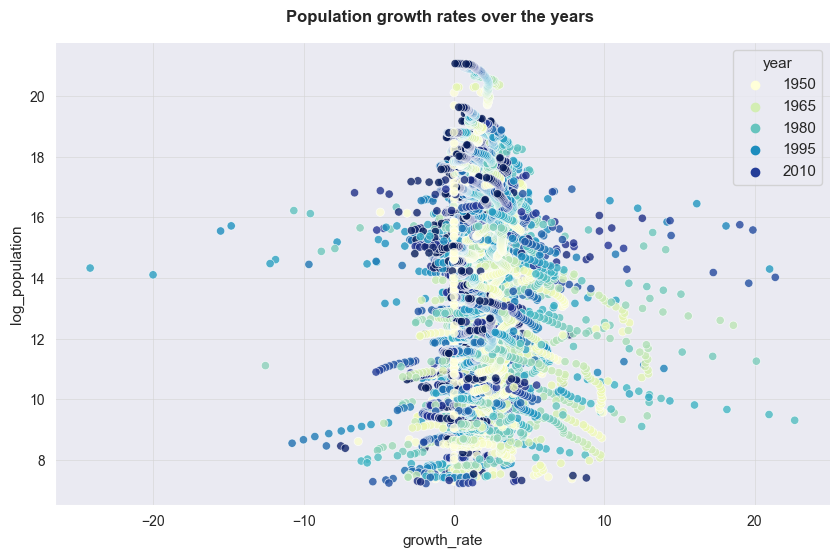

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='growth_rate', y='log_population', data=df, alpha=0.8, hue='year', palette='YlGnBu')
plt.title('Population growth rates over the years ')
plt.show()

**Observations**:
- Most of the countries have relatively stable populations with a growth rate between 0-10%, which is expected.  
- Some countries show high positive growth rates, which is possibly due to rapid development or migration. While some exhibits decline in population.  

- **Countries with higher population (top of the plot) tend to have smaller changes in growth rate.** 

- Earlier years are more scattered with higher growth rates than recent years.

### Top 5 Populated Countries for Last 5 Years

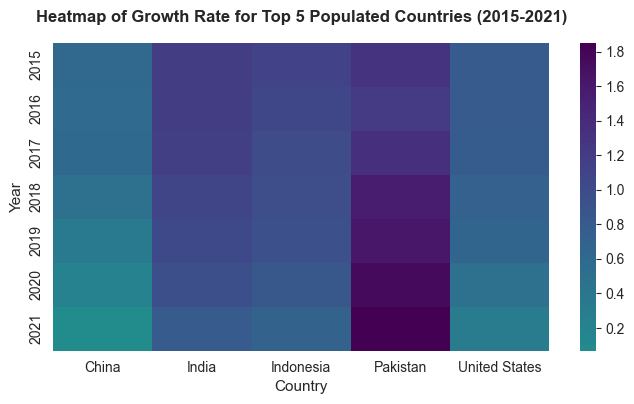

In [37]:
# Population growth rate (2015-2021)
top_countries = top_5_in_2021['country'].unique()
filtered_df = df[(df['year'].between(2015,2021)) & (df['country'].isin(top_countries))]
pivot_table = filtered_df.pivot(index='year', columns='country', values='growth_rate')
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, cmap='viridis_r', center=0)
plt.title('Heatmap of Growth Rate for Top 5 Populated Countries (2015-2021)')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()

- Pakistan showed a consistently higher growth rate in recent years (2019-2021).  
- China had a decline in population growth rate in 2021.

### Feature Correlation of Variables

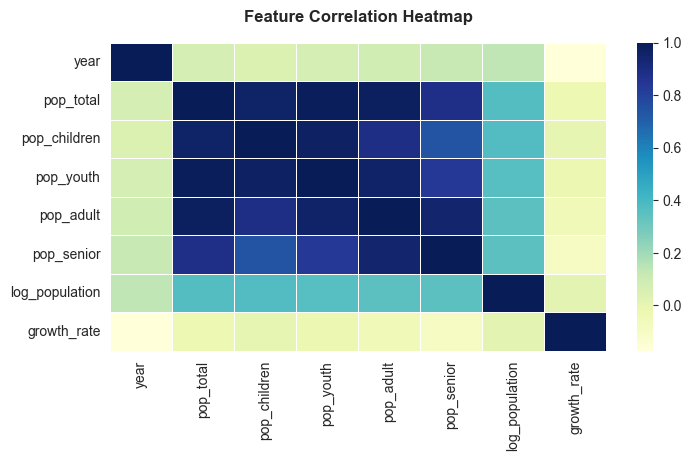

In [38]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Observations:**

- **Population**: The total population (`pop_total`) is **highly correlated** with all age-group categories (`pop_children`, `pop_youth`, `pop_adult`, `pop_senior`). This shows a consistent demographic trend, where changes in one age group tend to reflect proportionally in others. 


- **Growth Rate**: `growth_rate` (*YoY percentage change in population of a country*) exhibits **low correlation with total population and all age groups**, indicating that a high population does **not necessarily** equate to a high growth rate.  
    1. Highly populated countries (e.g., China, India) have a smaller percentage growth rate.  
    2. Some countries exhibit negative growth rates likely due to aging populations, emigration, or declining birth rates (e.g., Japan, Germany).
    3. This suggests that population expansion is influenced by external socio-economic and policy factors rather than just sheer population size.  

### Population Spread: Country Categories

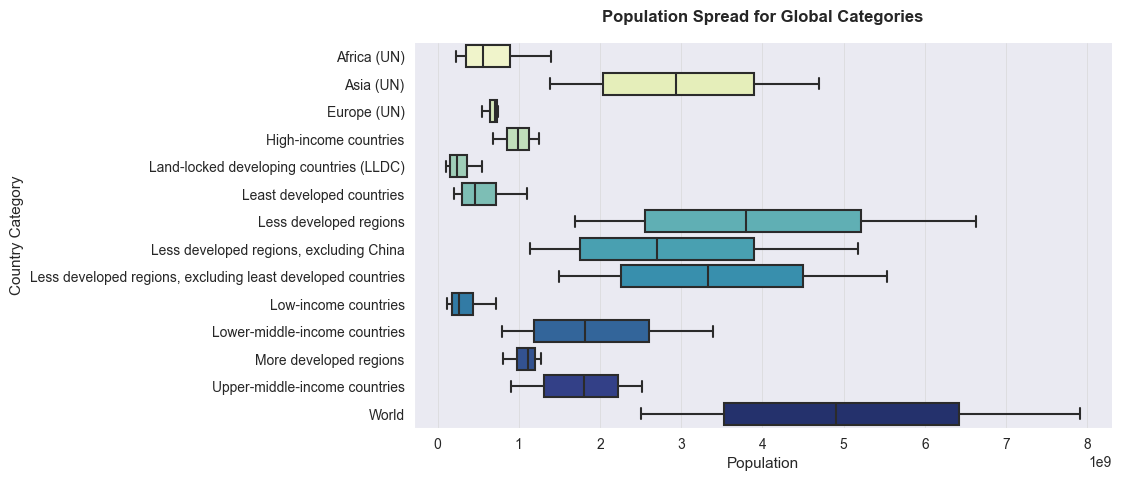

In [39]:
# plt.style.use('bmh')
plt.figure(figsize=(9, 5))
sns.boxplot(data=df_categories, x='pop_total', y='country', palette='YlGnBu')

plt.title('Population Spread for Global Categories')
plt.xlabel('Population')
plt.ylabel('Country Category')
plt.show()

**Note**: We are using total population (`pop_total`) instead of log-transformed population (`log_population`), as our focus here is on absolute growth trends rather than scaling.

**Observations:**
- The `World` category shows the highest overall population spread, ranging from approx. 3 billion to 7.5 billion of growth over time.
- `Asia (UN)` has a dominance in global population over other UN regions.
- `Africa (UN)` shows a smaller but a steady population increase in population.
- `High-income countries` experience slower population growth as compared to lower-middle-income countries.
- Countries under `less developed regions` have shown significant population growth despite economic constraints.

In [40]:
df.sample(5)

,country,year,pop_total,pop_children,pop_youth,pop_adult,pop_senior,log_population,growth_rate
12558,Oman,1980,1017473,1164676,256896,265336,18320,13.832834,5.617659
7382,Iran,1988,52111868,55111376,13410768,14792583,915584,17.768903,3.107078
16284,Thailand,1962,28242170,30369482,7356310,7766511,482273,17.156327,3.073741
10491,Mauritius,2001,1225272,722207,317067,546981,50082,14.018674,0.768301
15456,South Korea,1998,46250260,23337501,12549690,21922472,1803715,17.649578,0.626316


### Population Trends by Age Group 

<Figure size 800x400 with 0 Axes>

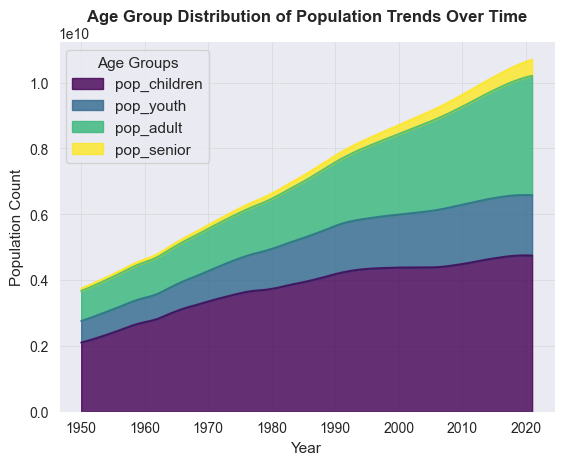

In [41]:
plt.figure(figsize=(8,4))
df_age = df.groupby('year')[['pop_children', 'pop_youth', 'pop_adult', 'pop_senior']].sum()
df_age.plot(kind='area', stacked=True, colormap='viridis', alpha=0.8)
plt.title('Age Group Distribution of Population Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Population Count')
plt.legend(title='Age Groups')
plt.show()

- There is a steady rise in the adult group which represents a increasing labor and economic development. 
- Although at a slower rate, the senior population is increasing as well.

Let's see if there are any visible patterns in trends in total population before and after the year 2000. 

To test this, I'll perform a statistical analysis using a **T-test** and visualize the distribution with a boxplot to understand population trends over time.

---

# T-test: Total Population Before vs After 2000
## Hypothesis for the T-test:
- Null Hypothesis(H₀): There is no significant difference in the mean total population before & after 2000.
- Alternative Hypothesis (H₁): There is a significant difference in the mean total population before & after 2000.

**Significance Level**: 0.05 (5%) to determine statistical difference

**Interpretation**:
- If *p-value < 0.05*, we reject H₀ and conclude that there is a significant difference in population before and after 2000.  
- If *p-value ≥ 0.05*, we fail to reject H₀, as we do not have enough evidence to conclude if the populations are significantly different.


We will also visualize this using a boxplot for a better analysis:

T-statistic: -6.685265678254886, P-Value: 2.4808424786817205e-11


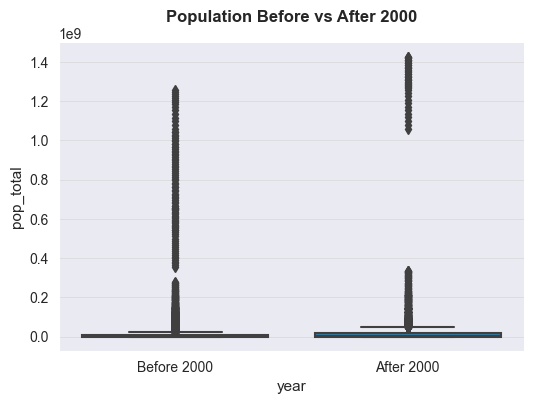

In [42]:
from scipy.stats import ttest_ind

# split
before_2000 = df[df['year'] < 2000]['pop_total']
after_2000 = df[df['year'] >= 2000]['pop_total']

# t-test
t_stat, p_value = ttest_ind(before_2000, after_2000, equal_var=False)
print(f"T-statistic: {t_stat}, P-Value: {p_value}")

# boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['year'] >= 2000, y=df['pop_total'], palette='YlGnBu')
plt.title("Population Before vs After 2000")
plt.xticks([0, 1], ["Before 2000", "After 2000"])
plt.show()

**Observations**:
- **t-statistic = -6.69**, which indicates the two groups have a measurable difference in mean population.
- **p-value << 0.05**, so we reject the null hypothesis (H₀) and conclude that population values before and after the year 2000 are significantly different.

However, we know that the population data is highly skewed which makes the t-test unpredictable.

---

## T-test: Log-transformed Population Before & After 2000
Let's use the `log_population` variable (log-transformed normalized population values) for the T-test:

**Hypothesis**
- Null Hypothesis(H₀): There is no significant difference in log-transformed population before & after 2000.
- Alternative Hypothesis (H₁): There is a significant difference in log-transformed population before & after 2000.

**Significance Level**: 0.05 (5%) to determine statistical difference

T-statistic: -13.5535, P-value: 0.0000


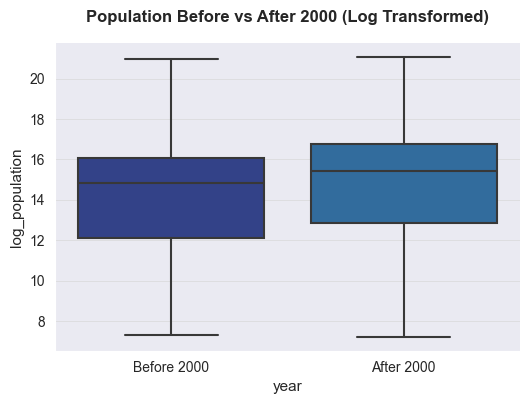

In [43]:
# split
before_2000 = df[df["year"] < 2000]["log_population"]
after_2000 = df[df["year"] >= 2000]["log_population"]

# t-test
t_stat, p_value = ttest_ind(before_2000, after_2000, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['year'] >= 2000, y=df['log_population'])
plt.title("Population Before vs After 2000 (Log Transformed)")
plt.xticks([0, 1], ["Before 2000", "After 2000"])
plt.show()

**Observations**:
- **t-statistic = -13.55**  suggests that mean log_population before 2000 is significantly lower than after 2000.
- **p-value << 0.0001**, is still low, we reject the null hypothesis and it confirms that there is a significant difference in population before vs after the year 2000.

# Conclusion
- We analyzed global population data from 1950 to 2021.
- We examined trends in total population and across age groups (children, youth, adults, seniors).
- Heatmaps and boxplots clearly highlighted demographic shifts over time.
- The raw data was highly skewed, so we applied a log transformation to normalize it.
- We compared population levels before and after 2000.
	- There is a significant increase in population after 2000.
	- Statistical Result: A t-test on log-transformed data confirmed a significant difference (p-value < 0.0001).

The data-driven insights from this analysis provide a good foundation for strategic planning and decision-making focusing on the requirements of a specific category of population.

In [44]:
df.to_csv("final_data.csv", index=False)